# Sentiment Analysis on Amazon food reviews
Here we are given data of about 5 lakh reviews from customers on food products.
We classify them as positive or negative based on the review text and summary.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
sqlobject = sqlite3.connect('./database.sqlite')
reviews = pd.read_sql_query("""SELECT * FROM Reviews""", sqlobject)
print reviews.shape
print type(reviews)
print reviews.head()
#rev=pd.read_csv("F:\Reviews.csv")
#rev1=pd.read_csv("Reviews.csv")
#print rev1.shape
#print rev1.columns
#print rev1.ProductId.nunique()
#print rev1.UserId.nunique()

(568454, 10)
<class 'pandas.core.frame.DataFrame'>
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I h

We are counting the reviews for different ratings.

In [2]:
data=reviews
score=reviews["Score"]
#reviews["Score"]=reviews['Score'].apply(lambda x: 'pos' if x > 3   else 'neg' )
print reviews["Score"].value_counts()
print data.shape
#print reviews.groupby('Score')['Summary'].count()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64
(568454, 10)


We classify the reviews as positive or negative based on star rating.
If review has less than 3 stars then it is considered as negative otherwise positive.

In [3]:
reviews["Score"]=reviews['Score'].apply(lambda x: 'p' if x > 3   else 'n' )
print reviews.groupby('Score')['Summary'].count()

Score
n    124677
p    443777
Name: Summary, dtype: int64


A brief exploratory analysis on the given data.
Positive reviews are very common.

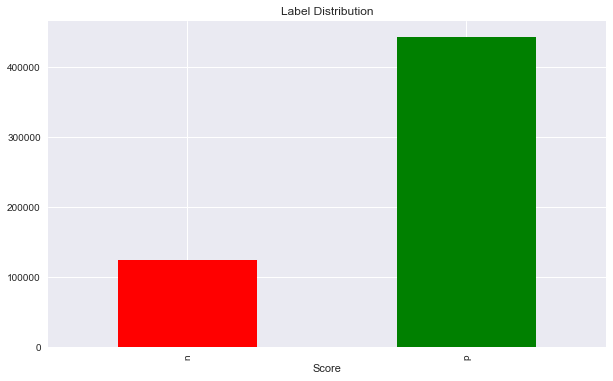

In [4]:
#this graph shows total number of positive and negative reviews.
reviews.groupby('Score')['Summary'].count().plot(kind='bar',color=['r','g'],title='Label Distribution',figsize=(10,6))
plt.show()

Positive reviews are shorter. Here we are plotting avegrage mean length of reviews for positive and negative category.

(124677, 10)
(443777, 10)
419.559896074 495.529696736


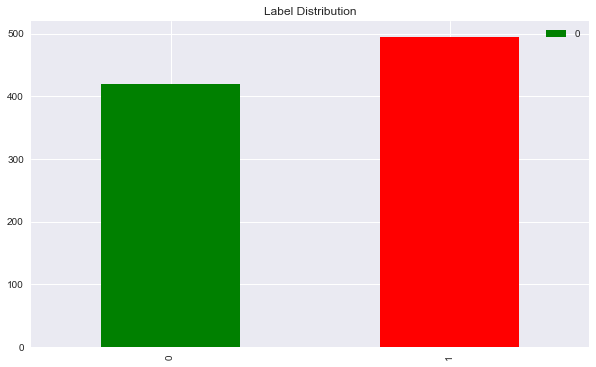

In [5]:
#Length of different positive reviews
import numpy as np
neg = reviews.loc[reviews['Score']=='n']
pos = reviews.loc[reviews['Score']=='p']
print neg.shape
print pos.shape
pl=np.mean(pos['Text'].str.len())
nl=np.mean(neg['Text'].str.len())
print pl,nl
lst=np.empty(2)
lst[0]=pl
lst[1]=nl
lst=pd.DataFrame(lst)
lst.plot(kind='bar',color=['g','r'],title='Label Distribution',figsize=(10,6))
plt.show()

We find the helpfulness ratio for each review by taking the ratio of 

                      helpfulness ratio =  (number of users who voted it as helpful)/(total number of reviews)
                      
We consider the review as helpful if the ratio is greater than 0.75 and not-helpful if ratio is less than 0.25.

In [6]:
from __future__ import division
hfactor=np.empty(len(reviews))
helpi=np.empty(len(reviews),dtype='string')
nr=reviews["HelpfulnessNumerator"]
dr=reviews["HelpfulnessDenominator"]
for i in range(len(reviews)):
    if dr[i]==0:
        x=0
    else:
        x=float((nr[i]/dr[i]))
    hfactor[i]=x
    #print type(helpi)
    if x>=0.75:
        helpi[i]='helpful'
    elif x>0.0 and x<0.25:
        helpi[i]='not-helpful'
    else:
        helpi[i]='nan'
        
reviews['hratio']=hfactor
reviews['help']=helpi
#plt.scatter(neg["HelpfulnessNumerator"]/neg["HelpfulnessDenominator"],neg["HelpfulnessNumerator"])
#sns.FacetGrid(reviews, hue="help", size=5).map(plt.bar, "hratio",).add_legend();


The following plot is for helpfulness of reviews against length of review.

help
h    209200
n    359254
Name: Summary, dtype: int64


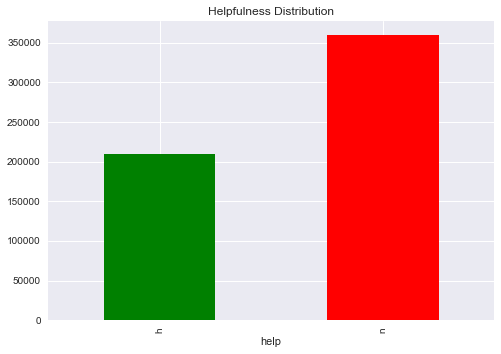

In [7]:
#print reviews["hratio"]
print reviews.groupby('help')['Summary'].count()
reviews.groupby('help')['Text'].count().plot(kind='bar',color=['g','r'],title='Helpfulness Distribution')
plt.show()

The following plot is helpfulness of review against the star rating for each review.

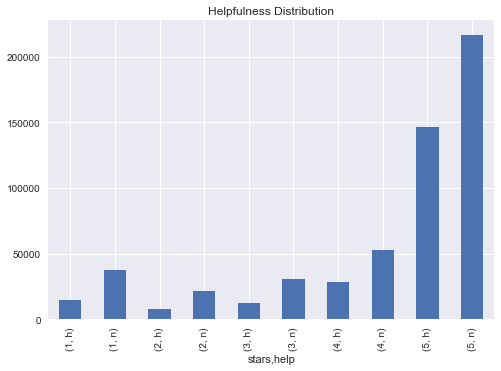

In [8]:
reviews['stars']=score
#print reviews['stars']
reviews.groupby(['stars','help'])['Summary'].count().plot(kind='bar',title='Helpfulness Distribution')
plt.show()

In [9]:
wc=np.empty(len(reviews))
text=reviews['Text']
for i in range(len(reviews)):
    wc[i]=len(text[i].split())
reviews['words']=wc

A box plot for word count for each review and rating for each review.

3432.0


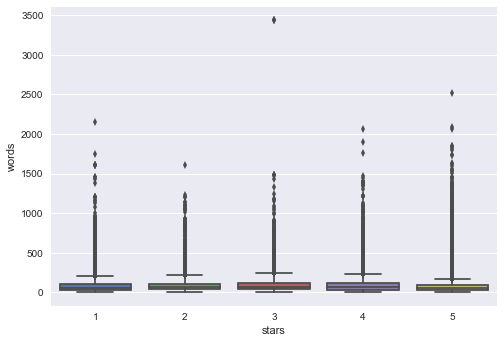

In [10]:
print max(reviews['words'])
sns.boxplot(x='stars',y='words', data=reviews)
plt.show()

 Longer reviews are more helpful.
 Therefore for this we plot a bar graph which has word count for reviews against the helpfulness of reviews.

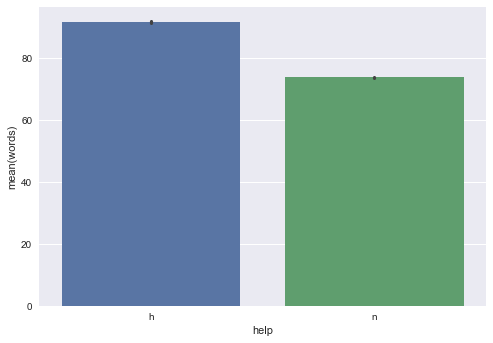

In [11]:
sns.barplot(x='help',y='words', data=reviews)
plt.show()

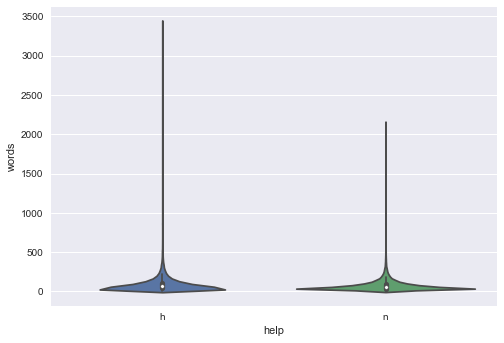

In [12]:
sns.violinplot(x=reviews['help'],y=reviews['words'])
plt.show()

Despite being more common and shorter, positive reviews are found more helpful.
We can show this by plotting a graph   helpfulness ratio for both positive and negative classes.

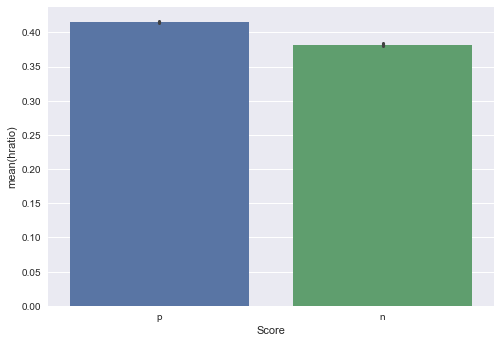

In [13]:
sns.barplot(x='Score',y='hratio', data=reviews)
plt.show()

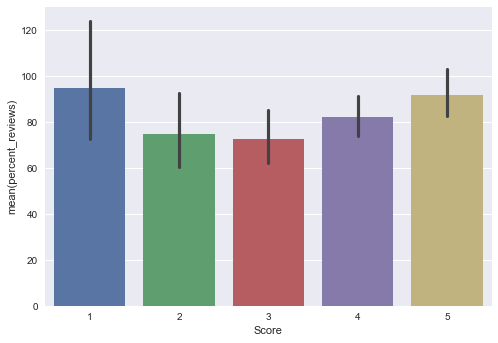

In [14]:
reviews1 = pd.read_sql_query("""SELECT COUNT(Id) AS percent_reviews,Score FROM Reviews GROUP BY
                                UserId HAVING COUNT(UserId)>50""", sqlobject)
#print reviews1
sns.barplot(x='Score',y='percent_reviews',data=reviews1)
plt.show()

Now we create a new dataframe which has class for each review, summary and text for each review.

In [15]:
new=pd.DataFrame(
{
    "stars":reviews['stars'],
    "class":reviews['Score'],
    "summary":reviews['Summary'],
    "text":reviews['Text']
})
print new.shape

(568454, 4)


In [ ]:
import nltk
nltk.download()

# Cleaning the data

 Here we are preprocessing the data and removing unnecessary details.
 We do following steps:
 <pre>
    1)  Remove all HTML tags using Beautifulsoup.
    2)  Combine both summary and text.
    3)  Convert entire data to lower case.
    4)  Remove all other symbols except alphabets and numbers.
    5)  Remove all stop words.
    6)  Stem the entire data.
 </pre>

We use nltk library for preprocessing the text. We store all stop words of English language in a set.

In [16]:
import scipy
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
stop_words = set(stopwords.words('english'))

Using beautifulsoup we are removing the HTML tags present in the data.

In [17]:
text=new['text']
rev=np.empty(len(new),dtype=object)
for i in range(len(new)):
    soup=BeautifulSoup(text[i], 'html.parser')
    rev[i]=soup
new['text']=rev
print new['text'].head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: text, dtype: object


In [18]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
ps = PorterStemmer()
#lemmatizer = nltk.WordNetLemmatizer()

Splitting the data into train and test.
<pre>
     Train data - 70% of data
     Test data  - 30% of data
</pre>

In [19]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(new, test_size = 0.3)
print train.shape
print test.shape

(397917, 4)
(170537, 4)


In [20]:
def cleaning(text):
    text=text.lower()
    text=text.split()
    tmp=[]
    for word in text:
        if word.isalnum():
            stem_word=ps.stem(word)
            if stem_word not in stop_words:
                tmp.append(stem_word)
    return ' '.join(tmp)

We construct bag_of_words for train data.

In [21]:
train_bag=[]
summ=train['summary']
text=train['text']
train_length=len(train)
index= summ.index
for i in range(train_length):
    j=index[i]
    s1=summ[j].encode('utf-8')
    s2=text[j].encode('utf-8')
    txt=s1+" "+s2
    txt=cleaning(txt)
    train_bag.append(txt)

In [22]:
print len(train_bag)

397917


We are constructing bag_of_words for test data.

In [23]:
test_bag=[]
summ=test['summary']
text=test['text']
test_length=len(test)
index= summ.index
for i in range(test_length):
    j=index[i]
    s1=summ[j].encode('utf-8')
    s2=text[j].encode('utf-8')
    txt=s1+" "+s2
    txt=cleaning(txt)
    test_bag.append(txt)

In [24]:
print len(test_bag)

170537


In [25]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

cvec=CountVectorizer(lowercase=False)
train_counts = cvec.fit_transform(train_bag)        

tfidf = TfidfTransformer()
train_tfidf = tfidf.fit_transform(train_counts)
print train_tfidf

  (0, 23715)	0.0714866764278
  (0, 48542)	0.177148775795
  (0, 7575)	0.147494141584
  (0, 46451)	0.628566843065
  (0, 11267)	0.205857108584
  (0, 32984)	0.103339783146
  (0, 19839)	0.216700977953
  (0, 29481)	0.056166364259
  (0, 6865)	0.0759804386208
  (0, 46132)	0.35107089753
  (0, 24427)	0.0916530995239
  (0, 56135)	0.150941849759
  (0, 55787)	0.0747682391909
  (0, 24681)	0.0626922644448
  (0, 32036)	0.127023833266
  (0, 36256)	0.0759844458438
  (0, 13316)	0.0700288674697
  (0, 6659)	0.0477657363272
  (0, 37274)	0.0446883480033
  (0, 42062)	0.0597482731096
  (0, 31010)	0.0475103135836
  (0, 7517)	0.0566136147079
  (0, 18501)	0.0622633634383
  (0, 4358)	0.050467965964
  (0, 22901)	0.223406182774
  :	:
  (397915, 47317)	0.19858120042
  (397915, 40268)	0.173463898431
  (397915, 47632)	0.162247603615
  (397915, 3978)	0.134546922303
  (397915, 47778)	0.13921897262
  (397915, 39814)	0.507469321314
  (397915, 19628)	0.139854910974
  (397915, 28644)	0.179993495252
  (397915, 45876)	0.220626

In [26]:
test_counts = cvec.transform(test_bag)
test_tfidf = tfidf.transform(test_counts)

# Bernoulli Naive Bayes

In [27]:
prediction = dict()
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB().fit(train_tfidf, train['class'])
prediction['Bernoulli'] = model.predict(test_tfidf)

In [28]:
print prediction.items()

[('Bernoulli', array(['p', 'p', 'p', ..., 'p', 'p', 'n'], 
      dtype='|S1'))]


# ROC for Bernoulli Naive Bayes

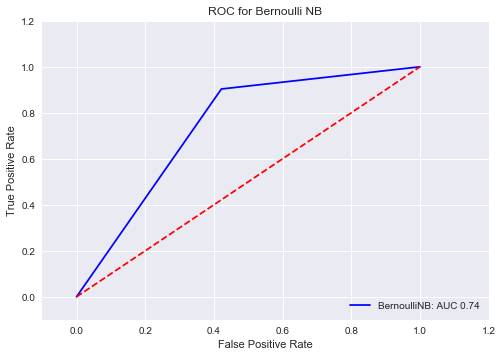

In [29]:
from sklearn.metrics import roc_curve, auc
def change(x):
    if x == 'n':
        return 0
    return 1

predict = prediction['Bernoulli']
p=np.vectorize(change)
#print type(p)
fpr, tpr, thresholds = roc_curve(test['class'].map(change),p(predict))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label='BernoulliNB: AUC %0.2f'% (roc_auc))

plt.title('ROC for Bernoulli NB')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Precision, Recall for BernoulliNB

In [30]:
from sklearn import metrics
m=metrics.classification_report(test['class'], prediction['Bernoulli'], target_names = ["positive", "negative"])
print(m)

             precision    recall  f1-score   support

   positive       0.63      0.58      0.60     37463
   negative       0.88      0.90      0.89    133074

avg / total       0.83      0.83      0.83    170537



# Confusion Matrix

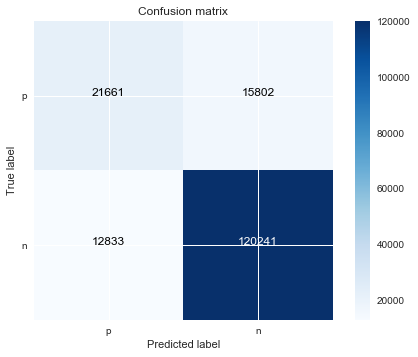

True Positives:21661
False Positives:15802
False Negatives:12833
True Negatives:120241


In [31]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_cm(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(new['class'])))
    plt.xticks(tick_marks,set(new['class']))
    plt.yticks(tick_marks,set(new['class']))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    fmt = 'd'
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
    
    
cm = confusion_matrix(test['class'], prediction['Bernoulli'])
np.set_printoptions(precision=3)
plt.figure()
plot_cm(cm) 
plt.show()
print "True Positives:%d"%cm[0][0]
print "False Positives:%d"%cm[0][1]
print "False Negatives:%d"%cm[1][0]
print "True Negatives:%d"%cm[1][1]

# Accuracy and Log-loss

In [32]:
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
p=np.vectorize(change)
ll=log_loss(test['class'].map(change),p(prediction['Bernoulli']))
print ("Log-loss:%f"%ll)
print("Accuracy:%.2f"%(accuracy_score(test['class'],prediction['Bernoulli'])))

Log-loss:5.799507
Accuracy:0.83


# Multinomial Naive Bayes

In [33]:
prediction = dict()
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(train_tfidf, train['class'])
prediction['Multinomial'] = model.predict(test_tfidf)

# ROC for Multinomial NB

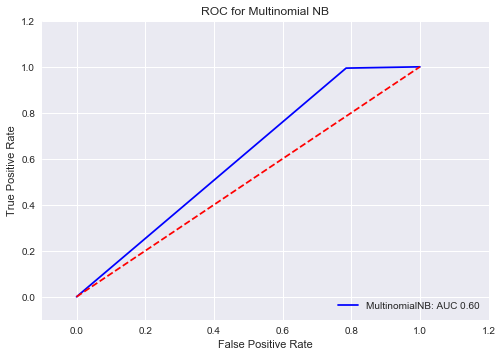

In [34]:
predict = prediction['Multinomial']
p=np.vectorize(change)
#print type(p)
fpr, tpr, thresholds = roc_curve(test['class'].map(change),p(predict))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label='MultinomialNB: AUC %0.2f'% (roc_auc))

plt.title('ROC for Multinomial NB')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Precision, Recall for Multinomial NB

In [35]:
m=metrics.classification_report(test['class'], prediction['Multinomial'], target_names = ["positive", "negative"])
print(m)

             precision    recall  f1-score   support

   positive       0.91      0.22      0.35     37463
   negative       0.82      0.99      0.90    133074

avg / total       0.84      0.82      0.78    170537



# Confusion matrix

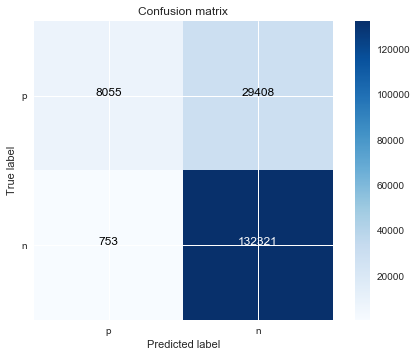

True Positives:8055
False Positives:29408
False Negatives:753
True Negatives:132321


In [36]:
cm = confusion_matrix(test['class'], prediction['Multinomial'])
np.set_printoptions(precision=3)
plt.figure()
plot_cm(cm) 
plt.show()
print "True Positives:%d"%cm[0][0]
print "False Positives:%d"%cm[0][1]
print "False Negatives:%d"%cm[1][0]
print "True Negatives:%d"%cm[1][1]

# Accuracy and Log-loss

In [37]:
p=np.vectorize(change)
ll=log_loss(test['class'].map(change),p(prediction['Multinomial']))
print ("Log-loss:%f"%ll)
print("Accuracy:%.2f"%(accuracy_score(test['class'],prediction['Multinomial'])))

Log-loss:6.108631
Accuracy:0.82


# Logistic Regression

# Grid Search for Parameter 'C'

In [38]:
from sklearn.grid_search import GridSearchCV
from sklearn import linear_model
#c_space = {0.001, 0.01, 0.1, 1,10, 100, 1000, 10000}
param_grid = {'C': [0.001, 0.01, 0.1, 1,10, 100, 1000, 10000]}
logreg = linear_model.LogisticRegression(penalty='l2')
logreg_cv = GridSearchCV(logreg, param_grid, cv=3)
x=logreg_cv.fit(train_tfidf, train['class'])

print x.best_params_
#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
#>>> clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
#GridSearchCV(cv=None,
 #            estimator=LogisticRegression(C=1.0, intercept_scaling=1,   
  #             dual=False, fit_intercept=True, penalty='l2', tol=0.0001),
   #          param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

F:\anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
F:\anaconda\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'C': 10}


In [39]:
prediction['Logistic'] = logreg_cv.predict(test_tfidf)

# ROC for Logistic Regression on L2

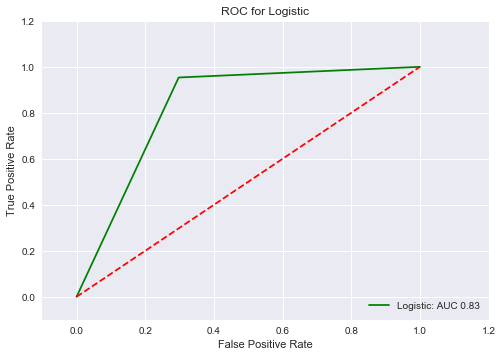

In [40]:
predict = prediction['Logistic']
p=np.vectorize(change)
#print type(p)
fpr, tpr, thresholds = roc_curve(test['class'].map(change),p(predict))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'g', label='Logistic: AUC %0.2f'% (roc_auc))

plt.title('ROC for Logistic')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Precision, Recall for Logistic Regression on L2

In [41]:
from sklearn import metrics
m=metrics.classification_report(test['class'], prediction['Logistic'], target_names = ["positive", "negative"])
print(m)

             precision    recall  f1-score   support

   positive       0.81      0.70      0.75     37463
   negative       0.92      0.95      0.94    133074

avg / total       0.90      0.90      0.90    170537



# Confusion Matrix

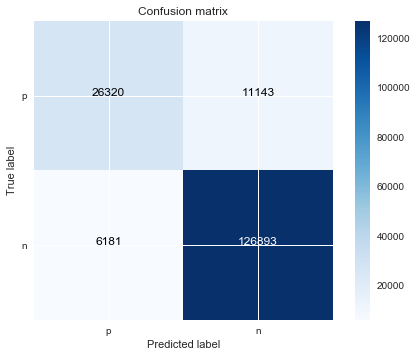

True Positives:26320
False Positives:11143
False Negatives:6181
True Negatives:126893


In [42]:
cm = confusion_matrix(test['class'], prediction['Logistic'])
np.set_printoptions(precision=3)
plt.figure()
plot_cm(cm) 
plt.show()
print "True Positives:%d"%cm[0][0]
print "False Positives:%d"%cm[0][1]
print "False Negatives:%d"%cm[1][0]
print "True Negatives:%d"%cm[1][1]

# Accuracy and Log-loss

In [43]:
p=np.vectorize(change)
ll=log_loss(test['class'].map(change),p(prediction['Logistic']))
print ("Log-loss:%f"%ll)
print("Accuracy:%.2f"%(accuracy_score(test['class'],prediction['Logistic'])))

Log-loss:3.508674
Accuracy:0.90


# Grid Search for Logistic Regression on L1

In [44]:
param_grid = {'C': [0.001, 0.01, 0.1, 1,10, 100, 1000, 10000]}
logreg = linear_model.LogisticRegression(penalty='l1')
logreg_cv = GridSearchCV(logreg, param_grid, cv=3)
x=logreg_cv.fit(train_tfidf, train['class'])
print x.best_params_

{'C': 10}


In [45]:
prediction['Logistic1'] = logreg_cv.predict(test_tfidf)

# ROC for Logistic Regression on L1

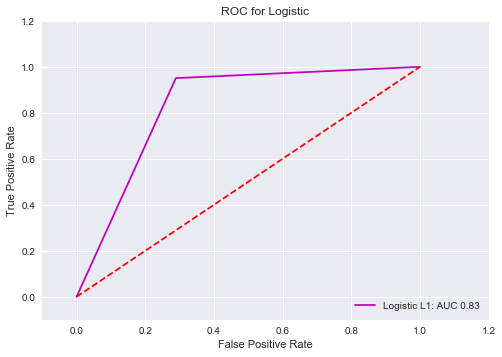

In [46]:
predict = prediction['Logistic1']
p=np.vectorize(change)
#print type(p)
fpr, tpr, thresholds = roc_curve(test['class'].map(change),p(predict))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'm', label='Logistic L1: AUC %0.2f'% (roc_auc))

plt.title('ROC for Logistic')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Precision, Recall for Logistic Regression on L1

In [47]:
from sklearn import metrics
m=metrics.classification_report(test['class'], prediction['Logistic1'], target_names = ["positive", "negative"])
print(m)

             precision    recall  f1-score   support

   positive       0.80      0.71      0.75     37463
   negative       0.92      0.95      0.94    133074

avg / total       0.90      0.90      0.90    170537



# Confusion matrix

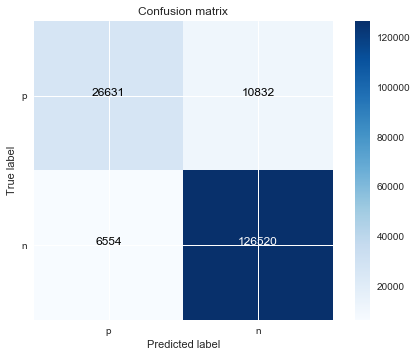

True Positives:26631
False Positives:10832
False Negatives:6554
True Negatives:126520


In [48]:
cm = confusion_matrix(test['class'], prediction['Logistic1'])
np.set_printoptions(precision=3)
plt.figure()
plot_cm(cm) 
plt.show()
print "True Positives:%d"%cm[0][0]
print "False Positives:%d"%cm[0][1]
print "False Negatives:%d"%cm[1][0]
print "True Negatives:%d"%cm[1][1]

# Accuracy and Log-loss

In [49]:
p=np.vectorize(change)
ll=log_loss(test['class'].map(change),p(prediction['Logistic1']))
print ("Log-loss:%f"%ll)
print("Accuracy:%.2f"%(accuracy_score(test['class'],prediction['Logistic1'])))

Log-loss:3.521229
Accuracy:0.90


# Top 100 Features

In [50]:
t = []
for line in train_bag:
    l = nltk.word_tokenize(line)
    for w in l:
        t.append(w)

In [51]:
word_features = nltk.FreqDist(t)
print (len(word_features))

59024


In [52]:
topwords = [f[0] for f in list(word_features.most_common(5000))]
print (word_features.most_common(25))

[(u'thi', 458603), (u'wa', 220877), (u'like', 199350), (u'tast', 161824), (u'love', 151912), (u'great', 138492), (u'good', 136731), (u'veri', 124950), (u'one', 118124), (u'use', 117375), (u'flavor', 108840), (u'tri', 105122), (u'coffe', 98748), (u'get', 97911), (u'product', 95497), (u'ha', 92505), (u'make', 87131), (u'would', 86217), (u'tea', 85349), (u'food', 79446), (u'dog', 75223), (u'buy', 73283), (u'realli', 71861), (u'onli', 70154), (u'eat', 68887)]


In [53]:
words = pd.DataFrame(word_features.most_common(100),columns=['words','count'])
print (words)

      words   count
0       thi  458603
1        wa  220877
2      like  199350
3      tast  161824
4      love  151912
5     great  138492
6      good  136731
7      veri  124950
8       one  118124
9       use  117375
10   flavor  108840
11      tri  105122
12    coffe   98748
13      get   97911
14  product   95497
15       ha   92505
16     make   87131
17    would   86217
18      tea   85349
19     food   79446
20      dog   75223
21      buy   73283
22   realli   71861
23     onli   70154
24      eat   68887
25     best   66000
26    littl   60289
27     much   59272
28    order   59095
29   becaus   58357
..      ...     ...
70      say   30742
71      way   30663
72    store   30419
73     sinc   30010
74    brand   29948
75    enjoy   29829
76     keep   29448
77     come   29433
78     take   29278
79     year   29172
80     seem   28891
81   differ   28733
82      lot   28556
83  favorit   28542
84     mani   28513
85    never   27794
86      doe   27693
87    sugar   27659


# Linear SVM
To perform linear SVM we consider a subset of 20000 features out of all features.

In [54]:
new_train=train_bag[:20000]
new_test=test_bag[:6000]
print len(new_train)

train_counts2 = cvec.fit_transform(new_train)        

train_tfidf2 = tfidf.fit_transform(train_counts2)
print train_tfidf2
tr=train['class'].head(20000)
te=test['class'].head(6000)
print len(tr)
test_counts2 = cvec.transform(new_test)
test_tfidf2 = tfidf.transform(test_counts2)

20000
  (0, 6509)	0.0720606313872
  (0, 13436)	0.179698444354
  (0, 1948)	0.145528864002
  (0, 12793)	0.627303788015
  (0, 3023)	0.203298781953
  (0, 9067)	0.103143739307
  (0, 5423)	0.220914613359
  (0, 8111)	0.0558582801068
  (0, 1772)	0.075888803734
  (0, 12719)	0.347363962329
  (0, 6703)	0.0939542364132
  (0, 15573)	0.14718557605
  (0, 15460)	0.0753318070211
  (0, 6782)	0.0630177797855
  (0, 8813)	0.126592430107
  (0, 9916)	0.0758120534615
  (0, 3602)	0.0709010456201
  (0, 1715)	0.0482239255927
  (0, 10177)	0.044728029985
  (0, 11573)	0.0596608450508
  (0, 8541)	0.0479372308048
  (0, 1935)	0.0573850302777
  (0, 5057)	0.0619820691301
  (0, 1092)	0.050761911363
  (0, 6276)	0.228364100206
  :	:
  (19999, 8459)	0.145072883983
  (19999, 2463)	0.0984132834862
  (19999, 710)	0.13329773502
  (19999, 15731)	0.124965309646
  (19999, 5686)	0.0919650944208
  (19999, 6214)	0.0906689575194
  (19999, 11321)	0.115773921813
  (19999, 8393)	0.138598755182
  (19999, 11386)	0.0948133302624
  (19999, 5

# Determining 'C' using Grid search

In [55]:
from sklearn import svm
param_grid = {'C': [ 1,10, 100, 1000,10000]}
linear_svm = svm.LinearSVC()
linear_svm_cv = GridSearchCV(linear_svm, param_grid, cv=3)
x=linear_svm_cv.fit(train_tfidf2, tr)
print x.best_params_

{'C': 1}


In [56]:
prediction['linearSVM'] = linear_svm_cv.predict(test_tfidf2)

# ROC for Linear SVM

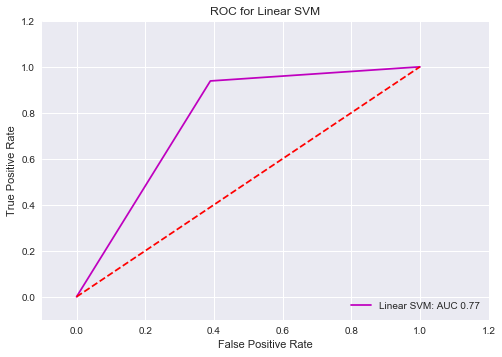

In [57]:
predict = prediction['linearSVM']
p=np.vectorize(change)
#print type(p)
fpr, tpr, thresholds = roc_curve(te.map(change),p(predict))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'm', label='Linear SVM: AUC %0.2f'% (roc_auc))

plt.title('ROC for Linear SVM')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Precision, Recall for Linear SVM

In [58]:
m=metrics.classification_report(te, prediction['linearSVM'], target_names = ["positive", "negative"])
print(m)

             precision    recall  f1-score   support

   positive       0.73      0.61      0.66      1283
   negative       0.90      0.94      0.92      4717

avg / total       0.86      0.87      0.86      6000



# Confusion matrix

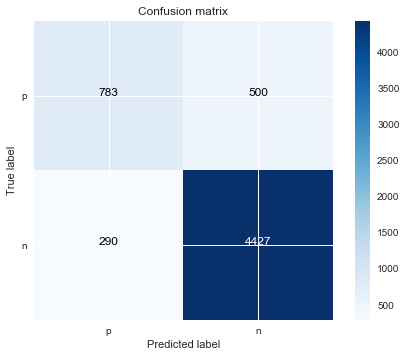

True Positives:783
False Positives:500
False Negatives:290
True Negatives:4427


In [59]:
cm = confusion_matrix(te, prediction['linearSVM'])
np.set_printoptions(precision=3)
plt.figure()
plot_cm(cm) 
plt.show()
print "True Positives:%d"%cm[0][0]
print "False Positives:%d"%cm[0][1]
print "False Negatives:%d"%cm[1][0]
print "True Negatives:%d"%cm[1][1]

# Accuracy and Log-loss

In [60]:
p=np.vectorize(change)
ll=log_loss(te.map(change),p(prediction['linearSVM']))
print ("Log-loss:%f"%ll)
print("Accuracy:%.2f"%(accuracy_score(te,prediction['linearSVM'])))

Log-loss:4.547672
Accuracy:0.87


# Kernel SVM
We take a subset of 5000 features to perform kernel SVM

In [61]:
new_train1=train_bag[:5000]
new_test1=test_bag[:1000]
print len(new_train1)

train_counts3 = cvec.fit_transform(new_train1)        

train_tfidf3 = tfidf.fit_transform(train_counts3)
print train_tfidf3
tr1=train['class'].head(5000)
te1=test['class'].head(1000)
print len(tr1)
test_counts3 = cvec.transform(new_test1)
test_tfidf3 = tfidf.transform(test_counts3)

5000
  (0, 3542)	0.0743307640188
  (0, 7280)	0.185052082198
  (0, 1007)	0.145668704497
  (0, 6921)	0.606380481236
  (0, 1588)	0.211299433463
  (0, 4889)	0.103970031706
  (0, 2923)	0.211299433463
  (0, 4371)	0.056738010659
  (0, 914)	0.0803499027987
  (0, 6879)	0.360052316205
  (0, 3640)	0.0991856854355
  (0, 8449)	0.1406784483
  (0, 8394)	0.0772877246707
  (0, 3680)	0.0642887088549
  (0, 4758)	0.128954685326
  (0, 5353)	0.0786340264684
  (0, 1910)	0.0734099477198
  (0, 881)	0.0493795366857
  (0, 5503)	0.0463608004398
  (0, 6259)	0.06195452487
  (0, 4610)	0.0499612426448
  (0, 1000)	0.0591338490291
  (0, 2714)	0.0648268954125
  (0, 559)	0.0530085128371
  (0, 3405)	0.235416524084
  :	:
  (4999, 3371)	0.106259124871
  (4999, 2435)	0.0711570626657
  (4999, 7217)	0.105730841036
  (4999, 4309)	0.0754719284685
  (4999, 8038)	0.12034414559
  (4999, 3630)	0.0545068609247
  (4999, 5803)	0.0801677077646
  (4999, 3441)	0.0670646484848
  (4999, 7882)	0.0764183306057
  (4999, 7083)	0.0895912957886
 

# Determing 'C' and 'gamma' for Kernel SVM

In [62]:
param_grid = {'C': [ 1,10, 100, 1000,10000],'gamma':[1e-1,1e-2,1e-3,1e-4,1e-5]}
kernel_svm = svm.SVC(kernel='rbf')
kernel_svm_cv = GridSearchCV(kernel_svm, param_grid, cv=3)
x=kernel_svm_cv.fit(train_tfidf3, tr1)
print x.best_params_

{'C': 10, 'gamma': 0.1}


In [63]:
prediction['rbfSVM'] = kernel_svm_cv.predict(test_tfidf3)

# ROC for Kernel SVM

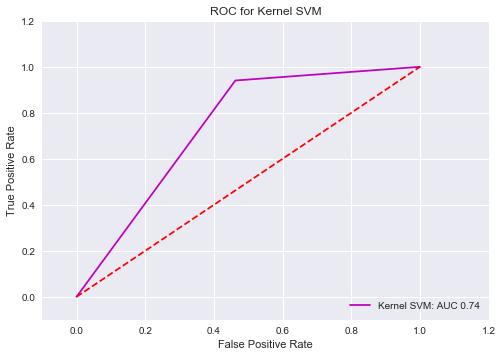

In [64]:
predict = prediction['rbfSVM']
p=np.vectorize(change)
#print type(p)
fpr, tpr, thresholds = roc_curve(te1.map(change),p(predict))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'm', label='Kernel SVM: AUC %0.2f'% (roc_auc))

plt.title('ROC for Kernel SVM')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Precision , Recall for Kernel SVM

In [65]:
m=metrics.classification_report(te1, prediction['rbfSVM'], target_names = ["positive", "negative"])
print(m)

             precision    recall  f1-score   support

   positive       0.73      0.54      0.62       227
   negative       0.87      0.94      0.91       773

avg / total       0.84      0.85      0.84      1000



# Confusion matrix

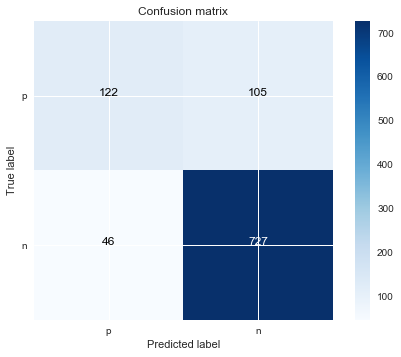

True Positives:122
False Positives:105
False Negatives:46
True Negatives:727


In [66]:
cm = confusion_matrix(te1, prediction['rbfSVM'])
np.set_printoptions(precision=3)
plt.figure()
plot_cm(cm) 
plt.show()
print "True Positives:%d"%cm[0][0]
print "False Positives:%d"%cm[0][1]
print "False Negatives:%d"%cm[1][0]
print "True Negatives:%d"%cm[1][1]

# Accuracy and Log-loss

In [67]:
p=np.vectorize(change)
ll=log_loss(te1.map(change),p(prediction['rbfSVM']))
print ("Log-loss:%f"%ll)
print("Accuracy:%.2f"%(accuracy_score(te1,prediction['rbfSVM'])))

Log-loss:5.215439
Accuracy:0.85
